In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
#pip install xlrd

In [155]:
df = pd.read_excel('ckd.xls', sheet_name = "All Data")
df.head()

,ID,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
0,1,65,1,white,0.0,0.0,1.0,other,1.0,56.0,...,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,2,36,1,hispa,0.0,NaN,1.0,noplace,0.0,60.2,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,66,1,white,0.0,1.0,0.0,noplace,1.0,83.9,...,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,54,1,white,1.0,0.0,0.0,DrHMO,1.0,69.4,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,63,1,black,0.0,0.0,NaN,clinic,1.0,73.1,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
df.isnull().sum()

ID                     0
Age                    0
Female                 0
Racegrp                0
Educ                  20
Unmarried            452
Income              1166
CareSource             0
Insured              113
Weight               194
Height               191
BMI                  290
Obese                290
Waist                314
SBP                  308
DBP                  380
HDL                   17
LDL                   18
Total Chol            16
Dyslipidemia           0
PVD                    0
Activity              10
PoorVision           567
Smoker                 0
Hypertension          80
Fam Hypertension       0
Diabetes               2
Fam Diabetes           0
Stroke                11
CVD                   23
Fam CVD              419
CHF                   36
Anemia                 6
CKD                 2819
dtype: int64

In [157]:
df.describe()
df.shape

(8819, 34)

In [158]:
d_obese=np.where(df['Weight']/(df['Height']/100)**2 <30, 0,1)
df.insert(3, 'dummy_Obese', d_obese)

In [159]:
df.drop(['ID','Educ','CareSource','Unmarried','Income','Insured','BMI','Obese','Weight',
       'Height','Waist','PoorVision'],inplace=True, axis=1)

In [160]:
df.shape

(8819, 23)

In [161]:
df.isna().sum()

Age                    0
Female                 0
dummy_Obese            0
Racegrp                0
SBP                  308
DBP                  380
HDL                   17
LDL                   18
Total Chol            16
Dyslipidemia           0
PVD                    0
Activity              10
Smoker                 0
Hypertension          80
Fam Hypertension       0
Diabetes               2
Fam Diabetes           0
Stroke                11
CVD                   23
Fam CVD              419
CHF                   36
Anemia                 6
CKD                 2819
dtype: int64

In [162]:
df = df.dropna(subset=['SBP','DBP','HDL','LDL','Total Chol','Activity','Hypertension','Diabetes','Stroke','CVD','Fam CVD',
                       'CHF','Anemia'])

In [163]:
df.shape

(7899, 23)

In [164]:
df.head()

,Age,Female,dummy_Obese,Racegrp,SBP,DBP,HDL,LDL,Total Chol,Dyslipidemia,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
0,65,1,0,white,135.0,71.0,48.0,249.0,297.0,0,...,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,36,1,0,hispa,96.0,52.0,31.0,135.0,166.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,66,1,1,white,115.0,57.0,44.0,211.0,255.0,1,...,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,54,1,0,white,110.0,57.0,74.0,156.0,230.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,63,1,0,black,132.0,73.0,67.0,154.0,221.0,0,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
df.isnull().sum()

Age                    0
Female                 0
dummy_Obese            0
Racegrp                0
SBP                    0
DBP                    0
HDL                    0
LDL                    0
Total Chol             0
Dyslipidemia           0
PVD                    0
Activity               0
Smoker                 0
Hypertension           0
Fam Hypertension       0
Diabetes               0
Fam Diabetes           0
Stroke                 0
CVD                    0
Fam CVD                0
CHF                    0
Anemia                 0
CKD                 2518
dtype: int64

In [166]:
df = df.dropna(subset=['CKD'])

In [167]:
df.shape

(5381, 23)

In [168]:
df['dummy_Obese'].describe()

count    5381.000000
mean        0.330979
std         0.470609
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: dummy_Obese, dtype: float64

In [169]:
df['dummy_Obese'].isnull().sum()

0

In [170]:
list(df.columns)

['Age',
 'Female',
 'dummy_Obese',
 'Racegrp',
 'SBP',
 'DBP',
 'HDL',
 'LDL',
 'Total Chol',
 'Dyslipidemia',
 'PVD',
 'Activity',
 'Smoker',
 'Hypertension',
 'Fam Hypertension',
 'Diabetes',
 'Fam Diabetes',
 'Stroke',
 'CVD',
 'Fam CVD',
 'CHF',
 'Anemia',
 'CKD']

In [171]:
df.isnull().sum()

Age                 0
Female              0
dummy_Obese         0
Racegrp             0
SBP                 0
DBP                 0
HDL                 0
LDL                 0
Total Chol          0
Dyslipidemia        0
PVD                 0
Activity            0
Smoker              0
Hypertension        0
Fam Hypertension    0
Diabetes            0
Fam Diabetes        0
Stroke              0
CVD                 0
Fam CVD             0
CHF                 0
Anemia              0
CKD                 0
dtype: int64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5381 entries, 0 to 5999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               5381 non-null   int64  
 1   Female            5381 non-null   int64  
 2   dummy_Obese       5381 non-null   int32  
 3   Racegrp           5381 non-null   object 
 4   SBP               5381 non-null   float64
 5   DBP               5381 non-null   float64
 6   HDL               5381 non-null   float64
 7   LDL               5381 non-null   float64
 8   Total Chol        5381 non-null   float64
 9   Dyslipidemia      5381 non-null   int64  
 10  PVD               5381 non-null   int64  
 11  Activity          5381 non-null   float64
 12  Smoker            5381 non-null   int64  
 13  Hypertension      5381 non-null   float64
 14  Fam Hypertension  5381 non-null   int64  
 15  Diabetes          5381 non-null   float64
 16  Fam Diabetes      5381 non-null   int64  


In [173]:
df.dtypes

Age                   int64
Female                int64
dummy_Obese           int32
Racegrp              object
SBP                 float64
DBP                 float64
HDL                 float64
LDL                 float64
Total Chol          float64
Dyslipidemia          int64
PVD                   int64
Activity            float64
Smoker                int64
Hypertension        float64
Fam Hypertension      int64
Diabetes            float64
Fam Diabetes          int64
Stroke              float64
CVD                 float64
Fam CVD             float64
CHF                 float64
Anemia              float64
CKD                 float64
dtype: object

In [174]:
df['Racegrp'].unique()

array(['white', 'hispa', 'black', 'other'], dtype=object)

In [175]:
df['Racegrp']=np.where(df['Racegrp'] !='white', 0,1)

In [176]:
df.head()

,Age,Female,dummy_Obese,Racegrp,SBP,DBP,HDL,LDL,Total Chol,Dyslipidemia,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
0,65,1,0,1,135.0,71.0,48.0,249.0,297.0,0,...,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,36,1,0,0,96.0,52.0,31.0,135.0,166.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,66,1,1,1,115.0,57.0,44.0,211.0,255.0,1,...,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,54,1,0,1,110.0,57.0,74.0,156.0,230.0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,63,1,0,0,132.0,73.0,67.0,154.0,221.0,0,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5381 entries, 0 to 5999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               5381 non-null   int64  
 1   Female            5381 non-null   int64  
 2   dummy_Obese       5381 non-null   int32  
 3   Racegrp           5381 non-null   int32  
 4   SBP               5381 non-null   float64
 5   DBP               5381 non-null   float64
 6   HDL               5381 non-null   float64
 7   LDL               5381 non-null   float64
 8   Total Chol        5381 non-null   float64
 9   Dyslipidemia      5381 non-null   int64  
 10  PVD               5381 non-null   int64  
 11  Activity          5381 non-null   float64
 12  Smoker            5381 non-null   int64  
 13  Hypertension      5381 non-null   float64
 14  Fam Hypertension  5381 non-null   int64  
 15  Diabetes          5381 non-null   float64
 16  Fam Diabetes      5381 non-null   int64  


In [178]:
df.Female.value_counts()

1    2826
0    2555
Name: Female, dtype: int64

In [179]:
df.Activity.value_counts()

2.0    2863
1.0    1352
3.0     819
4.0     347
Name: Activity, dtype: int64

<AxesSubplot:>

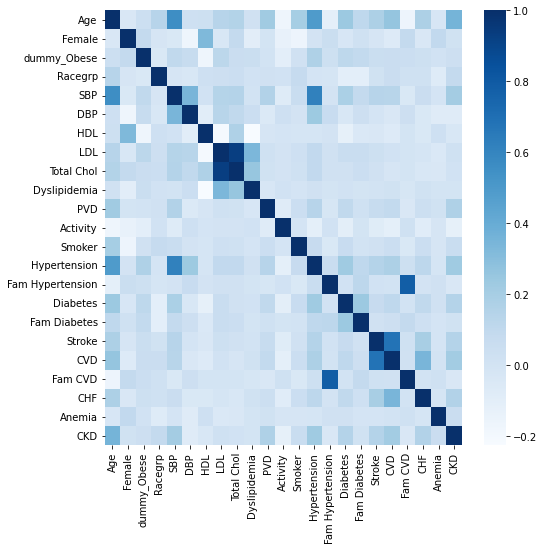

In [180]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

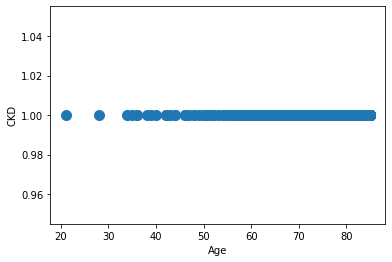

In [181]:
#df[['Age','CKD']].hist
a=df[df['CKD']==1]
a.plot.scatter(x = 'Age', y = 'CKD', s = 100);

C:\Users\hjain25\AppData\Local\Temp\ipykernel_21160\1051328237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Female']=np.where(a['Female']==0, 'M','F')


<AxesSubplot:xlabel='Female', ylabel='Count'>

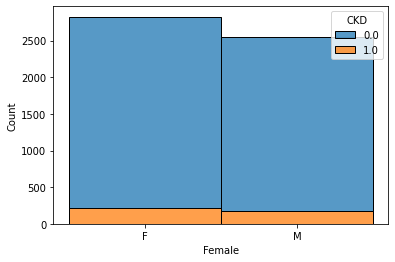

In [182]:
a=df[['Female','CKD']]
a['Female']=np.where(a['Female']==0, 'M','F')
sns.histplot(binwidth=0.5, x="Female", hue="CKD", data=a, stat="count", multiple="stack")

C:\Users\hjain25\AppData\Local\Temp\ipykernel_21160\3539428201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Age']=np.where(a['Age']>=60, '60+','<60')


<AxesSubplot:xlabel='Age', ylabel='Count'>

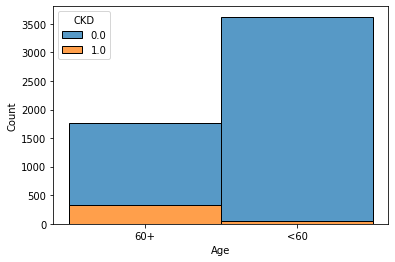

In [197]:
a=df[['Age','CKD']]
a['Age']=np.where(a['Age']>=60, '60+','<60')
sns.histplot(binwidth=0.5, x="Age", hue="CKD", data=a, stat="count", multiple="stack")

C:\Users\hjain25\AppData\Local\Temp\ipykernel_21160\2339961272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['dummy_Obese']=np.where(a['dummy_Obese']==0, 'Not Obese','Obese')


<AxesSubplot:xlabel='dummy_Obese', ylabel='Count'>

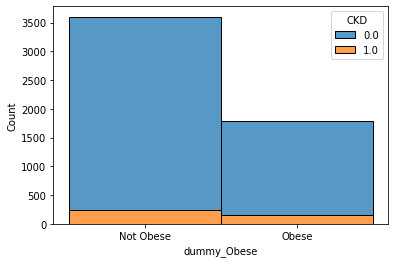

In [203]:
a=df[['dummy_Obese','CKD']]
a['dummy_Obese']=np.where(a['dummy_Obese']==0, 'Not Obese','Obese')
sns.histplot(binwidth=0.5, x="dummy_Obese", hue="CKD", data=a, stat="count", multiple="stack")

In [183]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

In [184]:
array = df.values
X = array[:,0:22]
Y = array[:,22]
test = SelectKBest(score_func=f_classif, k=4)#knearest-neighbor

In [185]:
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

AttributeError: 'RFE' object has no attribute 'scores_'

In [186]:
from sklearn.decomposition import PCA
X = array[:,0:22]
Y = array[:,0:22]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.731 0.126 0.078]
[[ 5.608e-02  1.952e-04  7.464e-04  3.872e-04  6.394e-02  2.794e-02
  -5.569e-03  7.070e-01  7.015e-01  1.563e-03  8.398e-05 -3.327e-05
   2.671e-04  1.011e-03  1.326e-04  2.585e-04  4.747e-04  9.808e-05
   1.654e-05 -7.097e-05 -4.820e-05 -1.032e-04]
 [ 6.070e-01 -1.113e-03  1.300e-03  8.646e-04  7.752e-01  1.450e-01
   3.288e-02 -7.849e-02 -4.562e-02 -6.736e-04  1.504e-03 -4.030e-03
   2.429e-03  1.259e-02 -8.398e-04  2.798e-03  1.825e-03  1.167e-03
   2.013e-03 -1.902e-03  7.922e-04 -9.000e-05]
 [ 3.881e-02  8.686e-03 -4.229e-03  9.929e-04 -5.898e-02 -1.149e-01
   8.089e-01 -3.962e-01  4.127e-01 -3.444e-03 -1.677e-04 -4.519e-04
  -1.955e-04 -1.163e-03 -2.192e-04 -1.847e-03 -1.193e-03 -3.141e-04
  -7.881e-04 -2.014e-04 -3.184e-04  2.268e-04]]


In [187]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = df.values
X = array[:,0:22]
Y = array[:,22]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, step=3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\hjain25\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hjain25\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Num Features: 11
Selected Features: [False  True  True  True False False False False False False  True  True
 False  True  True  True False False  True False  True  True]
Feature Ranking: [3 1 1 1 5 4 4 5 5 3 1 1 4 1 1 1 3 2 1 2 1 1]


In [188]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [189]:
lr = linear_model.LogisticRegression()

In [190]:
data2= df.drop(['CKD'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(data2, df['CKD'], test_size = 0.25)

lr = linear_model.LogisticRegression()
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)
model.score(x_train,y_train)

C:\Users\hjain25\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9301115241635688

In [191]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[1227   17]
 [  82   20]]


In [192]:
# The reult is telling us that we have 1202+10 correct predictions and 14+86 incorrect predictions
TP FP
TN FN

SyntaxError: invalid syntax (773096551.py, line 2)

In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1244
         1.0       0.54      0.20      0.29       102

    accuracy                           0.93      1346
   macro avg       0.74      0.59      0.62      1346
weighted avg       0.91      0.93      0.91      1346



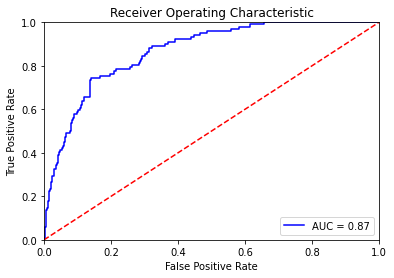

In [195]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()